# **DATA201 Project 2**

## Introduction

Our dataset is about pharmaceutical drug spending by country. We got it from a csv compiled [here](https://github.com/datasets/pharmaceutical-drug-spending?tab=readme-ov-file), but the data originates from the [Organization for Economic Cooperation and Development](https://datahub.io/core/pharmaceutical-drug-spending) (OECD). We then combined it with [several other OECD economic indicators](https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_EO_114%40DF_EO_114&df[ag]=OECD.ECO.MAD&dq=.UNR%2BPPP%2BGDPVD_CAP%2BGDPV_CAP.&pd=%2C&to[TIME_PERIOD]=false) for comparison, producing the dataframe seen below (this is why some the columns have such starkly different naming styles). The code used to generate this combined spreadsheet can be found [here](https://github.com/emmafurth/Data201/blob/main/project%202/oecd.ipynb).


In [1]:
# prepare and wrangle data using pandas and numpy

# import libraries
import numpy as np
import pandas as pd

# import dataset

df = pd.read_csv("https://raw.githubusercontent.com/emmafurth/Data201/refs/heads/main/project%202/pharmaceutical_data.csv")

df.head()

,Unnamed: 0,LOCATION,Country name,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Core inflation,Core inflation index,"Gross domestic product per capita, volume","Gross domestic product per capita, volume in USD, at constant purchasing power parities","Purchasing power parity, national currency per USD",Real net disposable income of households and non-profit institutions serving households,Unemployment rate
0,0,AUS,Australia,1971,15.992,0.726,33.990,439.73,NaN,NaN,37050.986560,22070.289979,0.693976,2.807105e+11,1.889748
1,1,AUS,Australia,1972,15.091,0.685,34.184,450.44,NaN,NaN,37299.072106,22218.067959,0.713033,2.945958e+11,2.589617
2,2,AUS,Australia,1973,15.117,0.681,37.956,507.85,NaN,NaN,38339.195778,22837.642043,0.764901,3.199179e+11,2.294517
3,3,AUS,Australia,1974,14.771,0.754,45.338,622.17,NaN,NaN,38344.985800,22841.091005,0.824775,3.401448e+11,2.656920
4,4,AUS,Australia,1975,11.849,0.682,44.363,616.34,NaN,NaN,38909.988567,23177.648168,0.859857,3.494302e+11,4.878655


### Our metrics defined

These are the metrics we chose to analyze, and their definitions:

* **LOCATION**: Abbreviated three letter country code
* **Reference area:**: The full name of the country
* **TIME**: The year, 1971-present
* **PC_HEALTHXP**:	The percentage of the country's total annual health care spending that are spent on pharmaceuticals
* **PC_GDP**:	The percentage of the country's annual GDP that is spent on pharmaceuticals
* **USD_CAP**:	The number of US dollars per capita spent on pharmaceuticals
* **TOTAL_SPEND**:	Total number of US dollars spent on pharmaceuticals
* **Gross domestic product per capita, volume**: The "size" of the economy divided by the population
* **Gross domestic product per capita, volume in USD, at constant purchasing power parities**	The "size" of the economy divided by the population, adjusted for the purchasing power of money
* **Purchasing power parity, national currency per USD**:	The exchange rate between the country's currency and USD that would need to be true for the cost of the same array of goods and services to be identical. In other words: if a particular basket of stuff cost $100 in the US, how much more or less would it cost to purchase an identical basket in this particular country? (Important note: because this measurement is based on a comparison with the US, the value is necessarily always one for the US)
* **Unemployment rate**:	The percentage of the labor force that is out of work




## EDA & Visualizations

In [2]:
df.isnull().sum()

,0
Unnamed: 0,0
LOCATION,0
Country name,72
TIME,0
PC_HEALTHXP,0
PC_GDP,0
USD_CAP,0
TOTAL_SPEND,0
Core inflation,796
Core inflation index,788


In [3]:
# Use EDA principles and the Matplotlib / Seaborn packages to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df.shape

(1341, 15)

In [5]:
df.dtypes

,0
Unnamed: 0,int64
LOCATION,object
Country name,object
TIME,int64
PC_HEALTHXP,float64
PC_GDP,float64
USD_CAP,float64
TOTAL_SPEND,float64
Core inflation,float64
Core inflation index,float64


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
LOCATION,0
Country name,72
TIME,0
PC_HEALTHXP,0
PC_GDP,0
USD_CAP,0
TOTAL_SPEND,0
Core inflation,796
Core inflation index,788


In [7]:
#dropping NA's in all of the following
df_clean = df.dropna(subset = ['Core inflation', 'Core inflation index', 'Gross domestic product per capita, volume', 'Gross domestic product per capita, volume in USD, at constant purchasing power parities'
,'Unemployment rate', 'Real net disposable income of households and non-profit institutions serving households', 'Purchasing power parity, national currency per USD', 'Country name'])

In [8]:
#columns that will be in these visualizations
columns_of_interest = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND',
    'Gross domestic product per capita, volume',
    'Gross domestic product per capita, volume in USD, at constant purchasing power parities',
    'Unemployment rate', 'Real net disposable income of households and non-profit institutions serving households','Purchasing power parity, national currency per USD']

In [9]:
#wanted to see number of statistics for all of the columns of interest
df[columns_of_interest].describe()

,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,"Gross domestic product per capita, volume","Gross domestic product per capita, volume in USD, at constant purchasing power parities",Unemployment rate,Real net disposable income of households and non-profit institutions serving households,"Purchasing power parity, national currency per USD"
count,1341.000000,1341.000000,1341.000000,1341.000000,1.207000e+03,1207.000000,1257.000000,9.000000e+02,1269.000000
mean,16.632877,1.215524,338.278398,14439.322088,1.409385e+06,36015.788994,7.206782,4.150641e+13,46.986896
std,6.613320,0.479568,226.158326,43259.358895,4.568762e+06,16179.855324,3.968725,1.442309e+14,159.233266
min,5.545000,0.207000,3.628000,5.810000,7.088871e+03,2608.046451,0.275396,5.313457e+09,0.000052
25%,11.849000,0.802000,144.592000,756.280000,2.494474e+04,26079.053952,4.399142,1.151549e+11,0.738694
50%,15.238000,1.187000,317.795000,2786.190000,4.049067e+04,33573.860438,6.535394,6.095472e+11,0.991146
75%,20.580000,1.524000,496.858000,8794.360000,3.252783e+05,43407.790693,9.101283,1.506948e+12,8.003530
max,40.239000,2.870000,1432.309000,475596.740000,3.813511e+07,115181.409773,27.466424,1.008365e+15,1328.016627


In [10]:
df_grouped = df.groupby('USD_CAP')['TOTAL_SPEND'].mean()

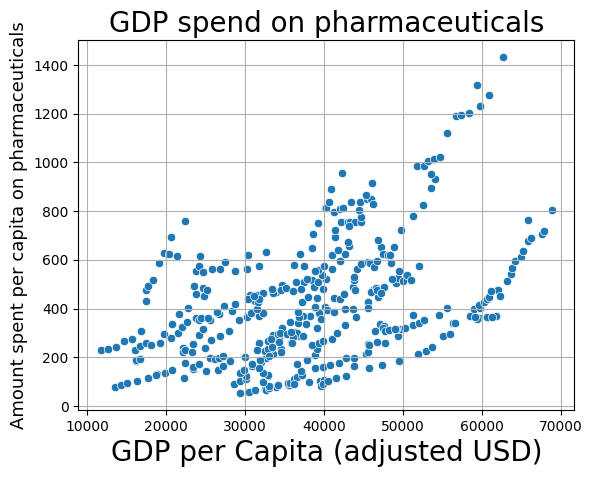

In [11]:
#plotting a scatterplot to see if there is increased spending on pharmaceuticals with increased GDP
sns.scatterplot(x = 'Gross domestic product per capita, volume in USD, at constant purchasing power parities', y = 'USD_CAP', data = df_clean)
plt.title("GDP spend on pharmaceuticals", fontsize = 20)
plt.xlabel("GDP per Capita (adjusted USD)", fontsize = 20)
plt.ylabel("Amount spent per capita on pharmaceuticals", fontsize = 13)
plt.grid(True)
plt.show()

In [12]:
Top_Countries = df.groupby('Country name')['PC_HEALTHXP'].mean().sort_values(ascending=False).head(10).reset_index()
2

2

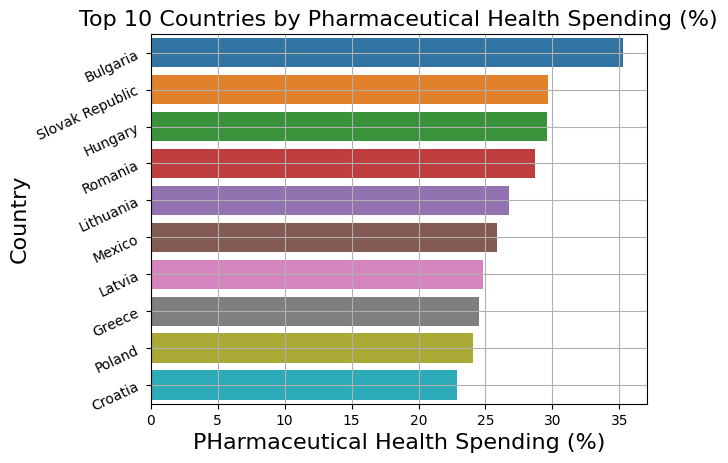

In [13]:
#These are the top 10 countries by pharmaceutical Health Spending (%)
sns.barplot(x = "PC_HEALTHXP", y = 'Country name', data = Top_Countries, hue = 'Country name')
plt.title('Top 10 Countries by Pharmaceutical Health Spending (%)', fontsize = 16)
plt.xlabel('PHarmaceutical Health Spending (%)', fontsize = 16)
plt.ylabel('Country', fontsize = 16)
plt.yticks(rotation = 25)
plt.grid(True)
plt.show()

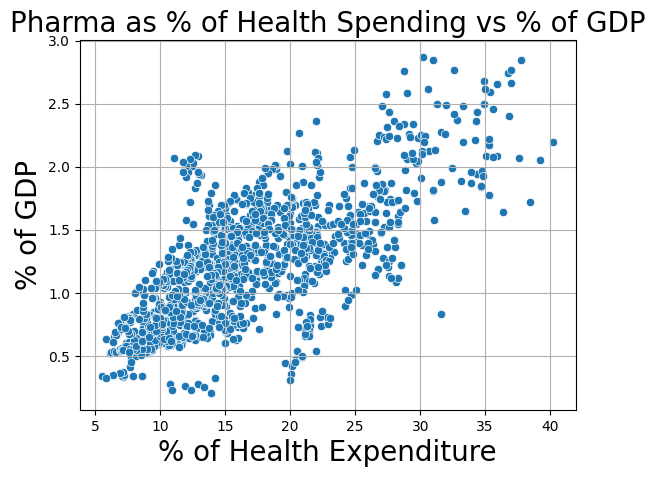

In [14]:
#I wanted to analyze how much of total health expenditures are spent on pharmaceuticals, and what percentage of GDP pharmaceutical spending represents.plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC_HEALTHXP', y='PC_GDP', data=df)
plt.title('Pharma as % of Health Spending vs % of GDP', fontsize = 20)
plt.xlabel('% of Health Expenditure', fontsize = 20)
plt.ylabel('% of GDP', fontsize = 20)
plt.grid(True)
plt.show()

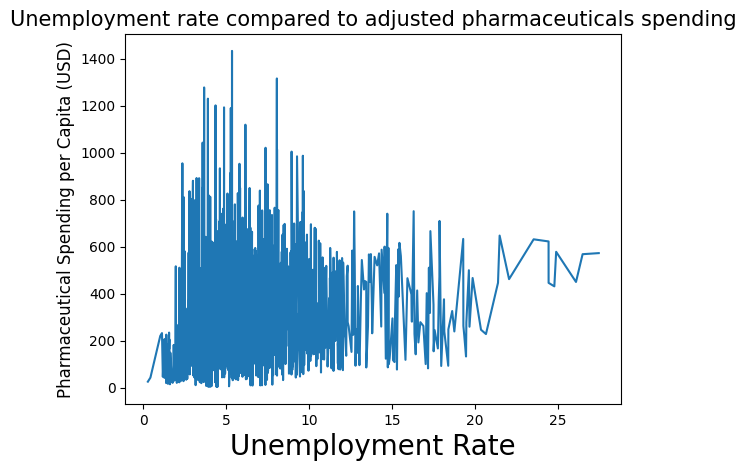

In [15]:
# Relationship between unemployment rate and adjusted pharmaceutical spending
sns.lineplot(x = 'Unemployment rate', y = 'USD_CAP', data = df)
plt.title("Unemployment rate compared to adjusted pharmaceuticals spending", fontsize = 15)
plt.xlabel("Unemployment Rate", fontsize = 20)
plt.ylabel("Pharmaceutical Spending per Capita (USD)", fontsize = 12)
plt.show()

## Linear Regression

In [16]:
# Use scikit-learn linear regression to train, test and predict a numerical target variable.
# Use appropriate metric and interpret the meaning of the score.
import sklearn as sk

#pick desired x columns
xcols = ['Gross domestic product per capita, volume in USD, at constant purchasing power parities',
         'PC_GDP']
ycol = ['USD_CAP']

#drop NA values
df_ml = df[xcols + ycol].dropna()

#subset the response and predictor variables
X = df_ml[xcols]
y = df_ml[ycol]

#split the model into training and testing data
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.30)

#check split data size
print("Shape of training and testing data: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of training and testing data:  (844, 2) (363, 2) (844, 1) (363, 1)


In [17]:

#fit the training data to a linear model
LinReg = sk.linear_model.LinearRegression().fit(X_train, y_train)

#use the model to predict test data
y_predicted = LinReg.predict(X_test)

#measure accuracy of the model using MSE
print("\nMSE of testing data: ", sk.metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print("MSE of training data: ", sk.metrics.mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

#get the R^2 score
r2 = LinReg.score(X_test, y_test)
print("\nR^2: ", r2)

#interperet
print(f"The % of GDP spent on pharmacueticals & GDP per capita (adjusted to account for purchasing parity) of a country \ncan explain about {np.round(r2*100, 2)}% of the variability in the total USD per capita spent on pharmacueticals")



MSE of testing data:  10668.095471195302
MSE of training data:  11549.187386589036

R^2:  0.7810104163773897
The % of GDP spent on pharmacueticals & GDP per capita (adjusted to account for purchasing parity) of a country 
can explain about 78.1% of the variability in the total USD per capita spent on pharmacueticals


Text(0.5, 1.0, 'Test Data Residuals')

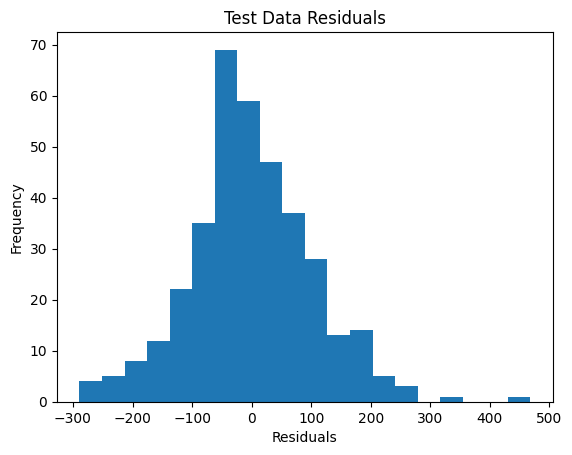

In [18]:
# Plot a histogram of the residuals and check if they have a Gaussian distribution
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted, bins = 20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Test Data Residuals")

The residuals have close to a normal distribution

Text(0.5, 1.0, 'All Data')

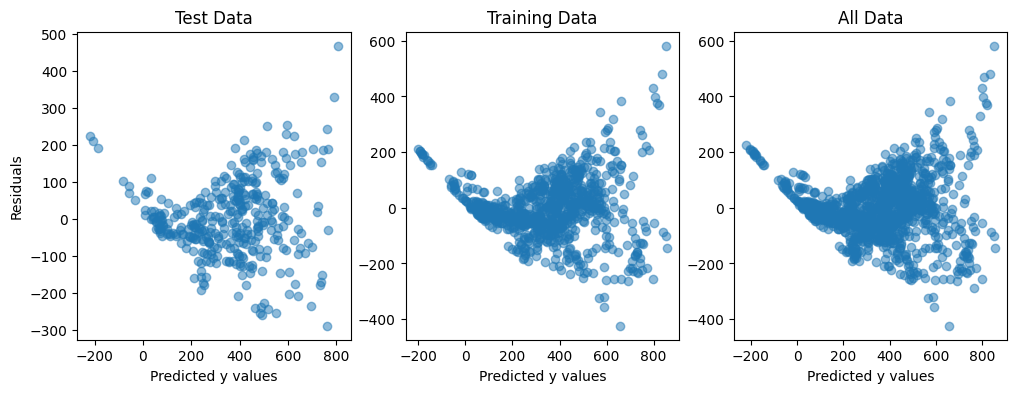

In [19]:
# scatterplot of predicted values and residuals to check assumption of homoscedasticity
plt.figure(figsize = [12.0, 4.0])
plt.subplot(1,3,1)
plt.scatter(y_predicted, y_test - y_predicted, alpha = 0.5);
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.title("Test Data")

plt.subplot(1,3,2)
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train), alpha = 0.5)
plt.xlabel("Predicted y values")
plt.title("Training Data")

plt.subplot(1,3,3)
plt.scatter(LinReg.predict(X), y - LinReg.predict(X), alpha = 0.5)
plt.xlabel("Predicted y values")
plt.title("All Data")


The variance of the residuals increases with predicted spending, so they do not appear to satisfy the assumption of homoscedasticity

In [20]:
# Get the coefficients of the linear regression
for i in xcols:
  print(f"{i}: {LinReg.coef_[0][xcols.index(i)]}")

print(f"Intercept: {LinReg.intercept_}\n")

#interperet the coefficients
print(f"\nFor every additional $1 in GDP per capita (adjusted for purchasing parity), a \ncountry's per capita spending on pharmacueticals is predicted to increase by ${np.round(LinReg.coef_[0][0], 4)}")
print(f"\nFor every additional 1% of the GDP spent on pharmacueticals, a country's \nper capita spending on pharmacueticals is predicted to increase by ${np.round(LinReg.coef_[0][1], 4)}")
print("\nThe intercept does not make sense to interperet in this context")

Gross domestic product per capita, volume in USD, at constant purchasing power parities: 0.008042516128039412
PC_GDP: 343.69892688776093
Intercept: [-354.82385353]


For every additional $1 in GDP per capita (adjusted for purchasing parity), a 
country's per capita spending on pharmacueticals is predicted to increase by $0.008

For every additional 1% of the GDP spent on pharmacueticals, a country's 
per capita spending on pharmacueticals is predicted to increase by $343.6989

The intercept does not make sense to interperet in this context
